# Stock Price Prediction using Machine Learning

## Objective
Predict stock closing prices using historical stock data and machine learning techniques.

## Dataset Overview
The dataset typically includes stock information like open, high, low, close prices and trading volume.

## Workflow
1. Load and explore the dataset
2. Preprocess the data
3. Visualize trends
4. Train regression models
5. Evaluate performance and make predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Finance Work\stock_data.csv")

# Rename date column and convert to datetime
df = df.rename(columns={"Unnamed: 0": "Date"})
df["Date"] = pd.to_datetime(df["Date"])

# Sort and set index
df = df.sort_values("Date").set_index("Date")

print(df.head())
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())

               Stock_1     Stock_2    Stock_3     Stock_4     Stock_5
Date                                                                 
2020-01-01  101.764052  100.160928  99.494642   99.909756  101.761266
2020-01-02  102.171269   99.969968  98.682973  100.640755  102.528643
2020-01-03  103.171258   99.575237  98.182139  100.574847  101.887811
2020-01-04  105.483215   99.308641  97.149381  100.925017  101.490049
2020-01-05  107.453175   98.188428  99.575396  101.594411  101.604283

Shape: (365, 5)

Columns: ['Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5']


In [3]:
# Summary statistics
df.describe()

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,107.772577,81.105216,94.519502,117.407560,106.866865
std,7.398296,11.435212,6.519213,6.778527,3.760968
min,91.474442,62.414219,81.111434,99.909756,99.833309
25%,101.603117,69.328263,89.788068,112.209912,103.927072
50%,107.421299,84.283525,94.495546,117.788079,106.411328
75%,113.741728,91.548859,99.919465,123.132365,109.178007
max,121.901773,100.160928,107.588373,129.911386,116.243803


## Data Preprocessing

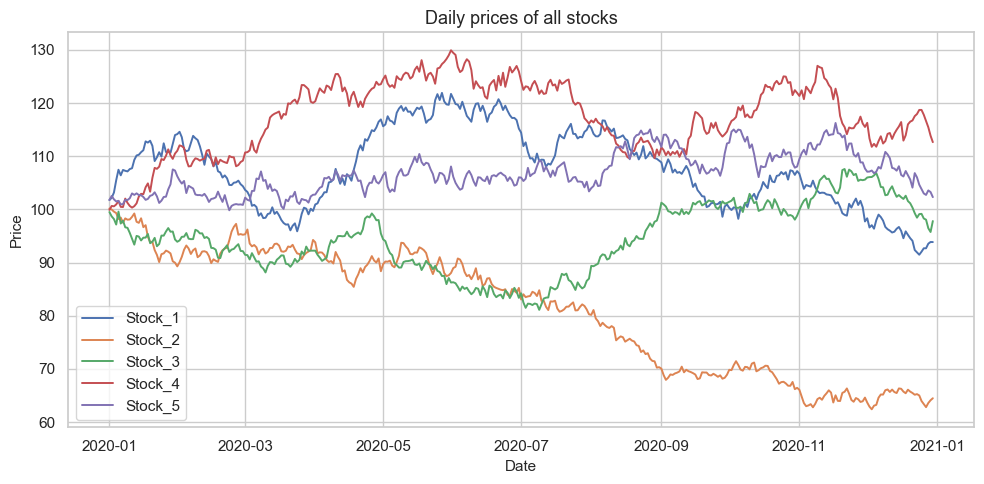

In [4]:
plt.figure(figsize=(10, 5))
for col in ["Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5"]:
    plt.plot(df.index, df[col], label=col, linewidth=1.4)
plt.title("Daily prices of all stocks")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_28392\1174092530.py:20: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


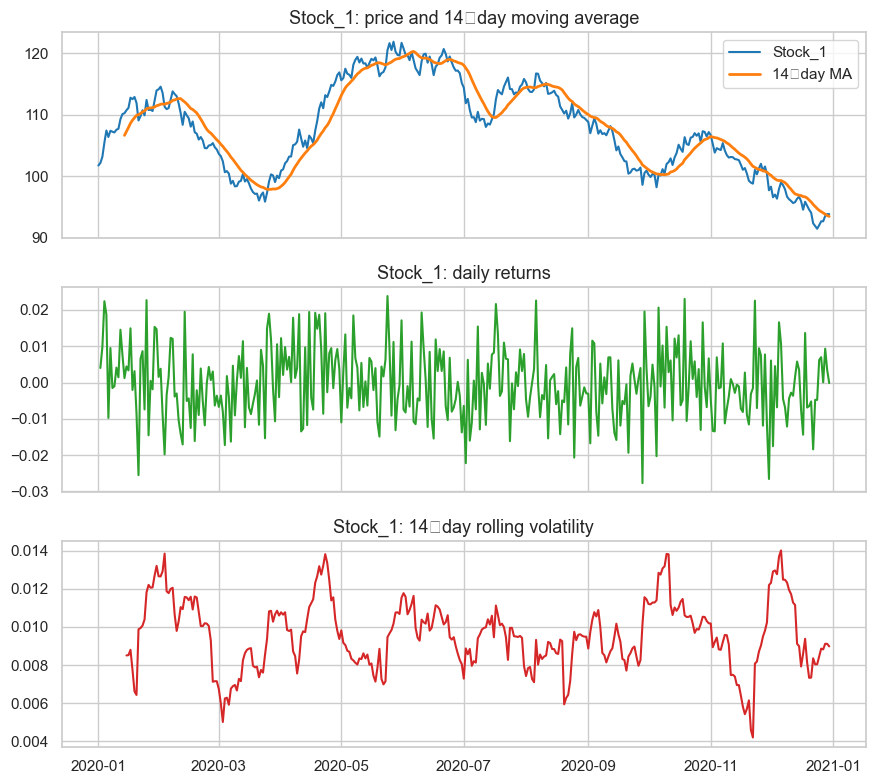

In [5]:
stock = "Stock_1"

df[f"{stock}_ret"] = df[stock].pct_change()
df[f"{stock}_ma_14"] = df[stock].rolling(window=14).mean()
df[f"{stock}_vol_14"] = df[f"{stock}_ret"].rolling(window=14).std()

fig, axes = plt.subplots(3, 1, figsize=(9, 8), sharex=True)

axes[0].plot(df.index, df[stock], label=stock, color="tab:blue")
axes[0].plot(df.index, df[f"{stock}_ma_14"], label="14‑day MA", color="tab:orange", linewidth=2)
axes[0].set_title(f"{stock}: price and 14‑day moving average")
axes[0].legend()

axes[1].plot(df.index, df[f"{stock}_ret"], color="tab:green")
axes[1].set_title(f"{stock}: daily returns")

axes[2].plot(df.index, df[f"{stock}_vol_14"], color="tab:red")
axes[2].set_title(f"{stock}: 14‑day rolling volatility")

plt.tight_layout()
plt.show()

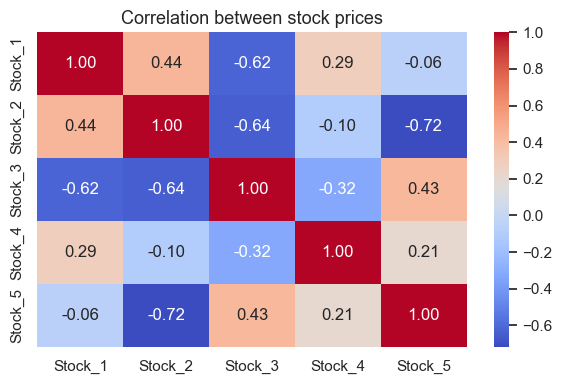

In [6]:
plt.figure(figsize=(6, 4))
corr = df[["Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between stock prices")
plt.tight_layout()
plt.show()

In [7]:
data = df.copy()

# Lag features (yesterday's price)
data["Stock_1_lag1"] = data["Stock_1"].shift(1)

# Target: next‑day Stock_1
data["Stock_1_next"] = data["Stock_1"].shift(-1)

# Drop first/last rows with NaNs from shift
data = data.dropna(subset=["Stock_1_lag1", "Stock_1_next"])

feature_cols = ["Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5", "Stock_1_lag1"]
X = data[feature_cols]
y = data["Stock_1_next"]

print("Feature shape:", X.shape, " Target shape:", y.shape)

Feature shape: (363, 6)  Target shape: (363,)


## Model Training

In [8]:
split_idx = int(len(data) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print("Train size:", X_train.shape[0], " Test size:", X_test.shape[0])

Train size: 290  Test size: 73


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

RMSE: 0.951
R²:   0.959


## Model Evaluation

C:\Users\hp\AppData\Local\Temp\ipykernel_28392\1322217169.py:8: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


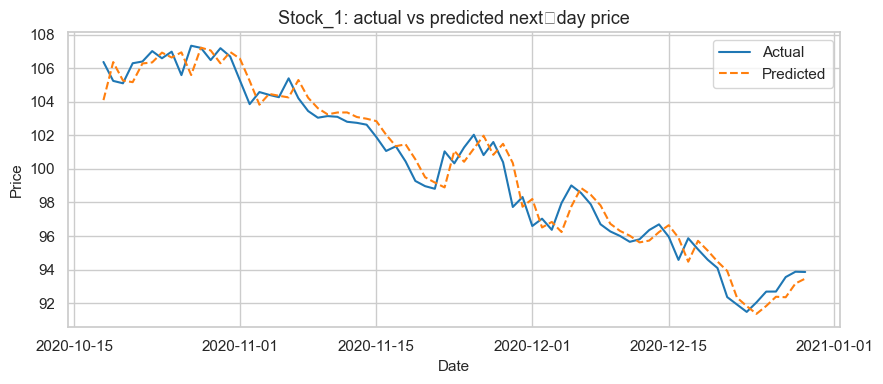

In [10]:
plt.figure(figsize=(9, 4))
plt.plot(y_test.index, y_test, label="Actual", color="tab:blue")
plt.plot(y_test.index, y_pred, label="Predicted", color="tab:orange", linestyle="--")
plt.title("Stock_1: actual vs predicted next‑day price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_28392\2717135918.py:9: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


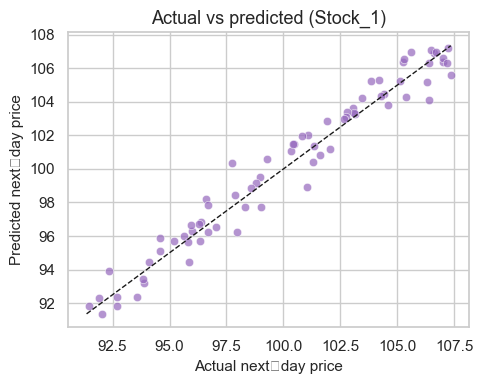

In [11]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=y_test, y=y_pred, color="tab:purple", alpha=0.7)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], "k--", linewidth=1)
plt.xlabel("Actual next‑day price")
plt.ylabel("Predicted next‑day price")
plt.title("Actual vs predicted (Stock_1)")
plt.tight_layout()
plt.show()

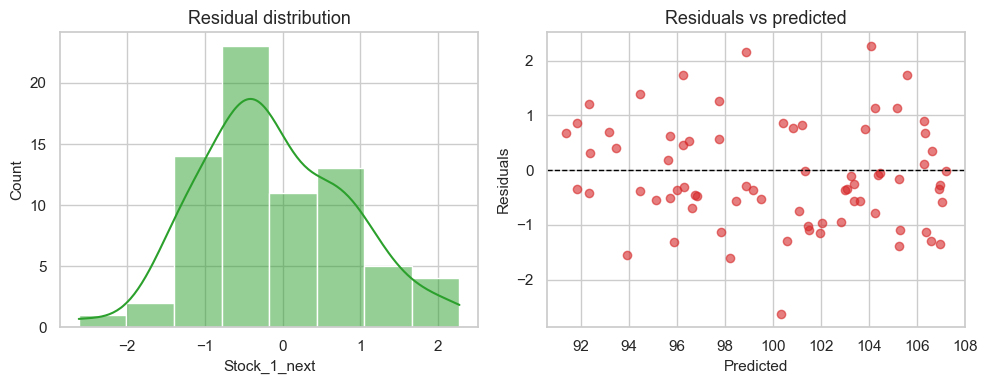

In [12]:
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(residuals, kde=True, ax=axes[0], color="tab:green")
axes[0].set_title("Residual distribution")

axes[1].scatter(y_pred, residuals, alpha=0.6, color="tab:red")
axes[1].axhline(0, color="black", linestyle="--", linewidth=1)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs predicted")

plt.tight_layout()
plt.show()

## Conclusion
- The model provides a basic prediction of stock prices based on past trading data.
- Further work could involve using time-series models like LSTM, ARIMA, or more complex ML models.